<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/DSP_Lab3_echo_canceller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Реализация алгоритма адаптивного эхо-подавления.

**Практическая работа по дисциплинам "ТОПД", "ЦОС"**

*Кафедра КБ-2(КБ-3), МИРЭА, 2020г.*

**Дата проведения занятия:** 05.12.2020.

**Время:** 09:00-10:40. 

**Место/Форма проведения занятия:** Дистанционное обучение/Конференция Discord. 

**Постоянная ссылка на видео-конференцию:** 

**Цель:** Изучение алгоритма LMS. Практическая реализация алгоритма LMS.


## Задание
* Реализовать модель дальнего эхо сигнала в виде (см. схему):
\begin{align}
z_n= & x_{n+5000}-2x_{n+4000}-0.4x_{n+3000}+x_{n+2000}-\frac{1}{2}x_{n+1000} \\
 & -\frac{1}{2}x_{n-1000}+x_{n-2000}-0.4x_{n-3000}-2x_{n-4000}+x_{n-5000}
 \tag{1}
\end{align}

* Выбрать структуру адаптивного фильтра для подавления дальнего эхо-сигнала (см. схему).
* Реализовать адаптивный фильтр для подавления дальнего эхо-сигнала (см. схему) с использованием алгоритма LMS.
* Построить график адаптации коэффициентов фильтра.
* Построить импульсную и частотную характеристики фильтра после стабилизации коэффициентов.

## Схема эхо-компенсации

![image](https://drive.google.com/uc?export=view&id=1EfqxEBtx__BzJSxlCoNatlEM0-pO2QNh)


In [21]:
import numpy as np
from IPython.display import Audio

# Загрузка файла со звуком для абонента A
x = np.loadtxt("https://raw.githubusercontent.com/RF-Lab/lab_sources/master/x_modem_16000.txt")
x = x[0:120000]
print(x.shape)
Audio(x,rate=16000)

(120000,)


In [20]:
# Загрузка файла со звуком для абонента B
y = np.loadtxt("https://raw.githubusercontent.com/RF-Lab/lab_sources/master/x_sound_16000.txt")
y = y[0:120000]
print(y.shape)
Audio(y,rate=16000)

(120000,)


In [22]:
# Модель эхо-сигнала

import matplotlib.pyplot as plt
from scipy import signal

# Размер памяти для модели эхо-сигнала
M       = 5
# Длина сигнала
N       = x.shape[0]
# Матрица составленная из столбцов - сдвинутых копий сигнала x
X       = np.zeros( (N, 2*M+1) )

for m in range(-M,M):
  X[:,m+M]  = np.roll( x, 1000*m )

c_model = np.array([1.0,-2.0,-0.4, 1.0, -0.5,  0.0,  -0.5, 1.0, -0.4,-2.0,1.0])

# z - эхо-сигнал
z  = X@c_model
Audio(z,rate=16000)



Эпоха #0
Эпоха #1
Эпоха #2


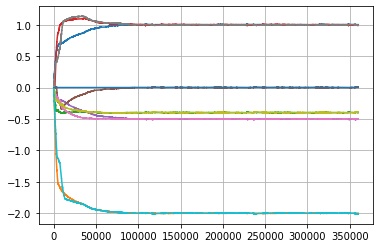

In [39]:
import matplotlib.pyplot as plt

# Количество эпох
E               = 3 

# Коэффициенты адаптивного фильтра для каждого отсчета времени
C               = np.zeros((2*M+1,N*E))

# Сигнал u, принятый абонетном A содержит сумму полезного
# сигнала y и эхо-сигнала z
u               = y + z

# Выход адаптивного фильтра фильтра
f               = x*0

# Очищенный сигнал (он же - сигнал ошибки!)
e               = x*0

# mu - скорость адаптации
mu              = 5e-11

# Алгоритм LMS:
idx             = 0
for epoch in range(0,E):
  print('Эпоха #{0}'.format(epoch))
  for n in range(0,N-1):
    # Выход адаптивного фильтра в момент времени n
    f[n]          = X[n,:] @ C[:,idx]
    # Очищенный сигнал в момент времени n
    e[n]          = u[n] - f[n]
    # Обновление коэффициентов (LMS)
    C[:,idx+1]    = C[:,idx] + mu*e[n]*(X[n,:].transpose())
    idx           = idx + 1

plt.plot(C[:,:idx].transpose())
plt.grid(True)


In [41]:
Audio(u,rate=16000)

In [42]:
Audio(e,rate=16000)

* Коэффициенты полученного фильтра (LMS) plot(С[:,-1])
* График ошибка $\varepsilon_n^2$ vs номер итерации.

